# Exercise 4

## 1. Boston Housing
In this exercise, we are going to predict the house price from the `Boston` data set using tree methods.

The following code will get you started:

In [1]:
library(mlbench)
library(glmnet)
library(randomForest)
library(tree)
library(caret)
data(BostonHousing)
trainIndex <- createDataPartition(BostonHousing$medv,p=0.7,list=FALSE)
training.data <- BostonHousing[trainIndex,]
test.data <- BostonHousing[-trainIndex,]
x <- model.matrix(medv~.,data=training.data)[,-1]
y <- training.data$medv

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.
Loading required package: lattice
Loading required package: ggplot2

Attaching package: ‘ggplot2’

The following object is masked from ‘package:randomForest’:

    margin



**a.** Train a full regression tree for `medv` in the `training.data` dataset. Plot the tree.

Solution:

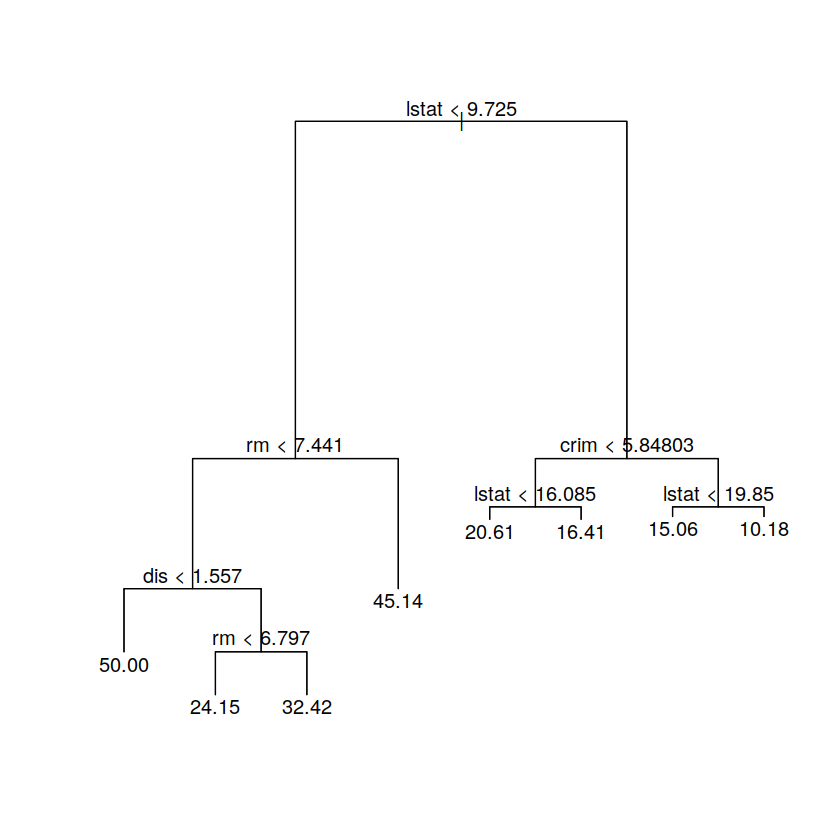

In [2]:
boston.tree <- tree(medv~.,data=training.data)
plot(boston.tree)
text(boston.tree)

**b.** Prune the tree. Find the optimal cost complexity parameter `k` using Cross-validation. Plot the `deviance` on the `size` of the trees. Plot the deviance-minimizing pruned tree.

Solutions:

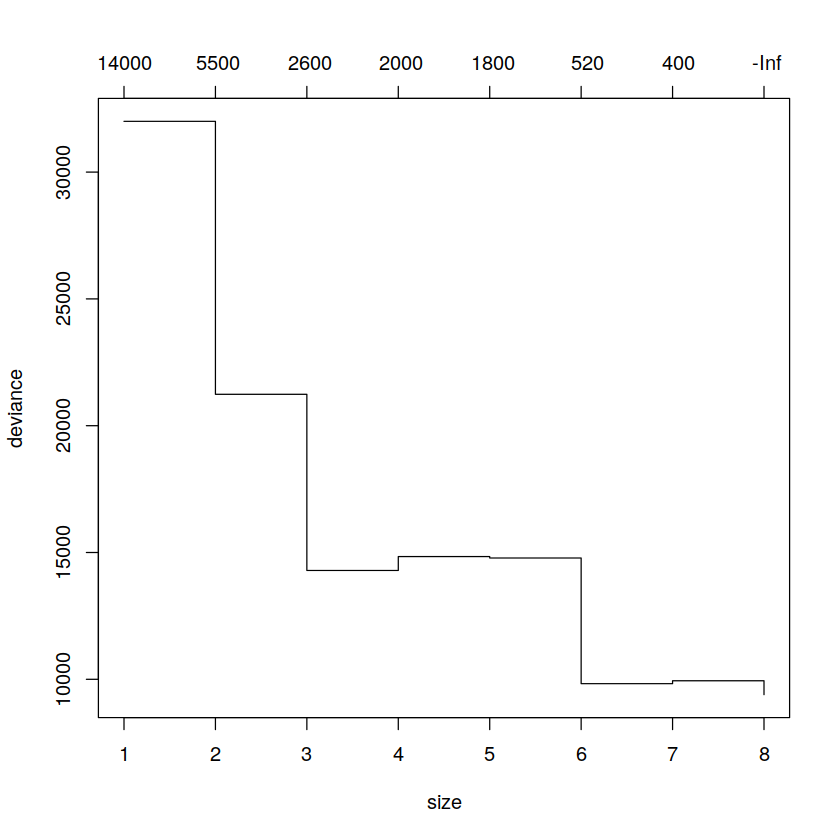

In [3]:
cv.boston.tree <- cv.tree(boston.tree)
k.min <- cv.boston.tree$k[which.min(cv.boston.tree$dev)]
plot(cv.boston.tree)

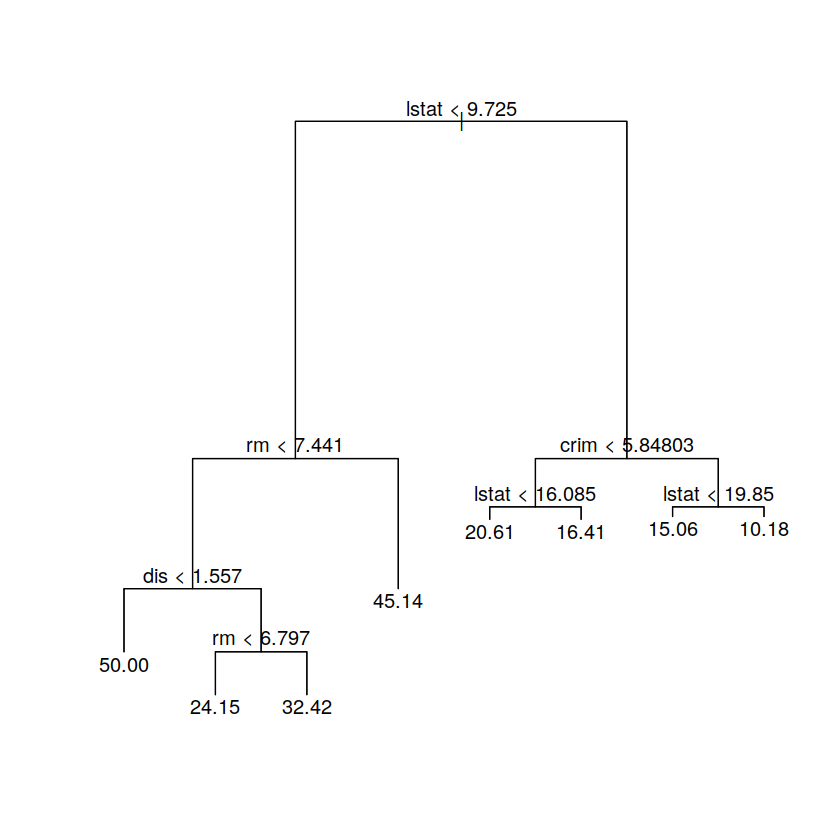

In [4]:
pruned.tree <- prune.tree(boston.tree,k=0)
plot(pruned.tree)
text(pruned.tree)

**c.** Now grow a random forest with 1000 trees to predict `medv`. Plot the out-of-bag (OOB) error rate as a function of the number of trees.

Solutions:

In [5]:
rf.boston <- randomForest(medv~.,data=training.data,ntree = 1000)

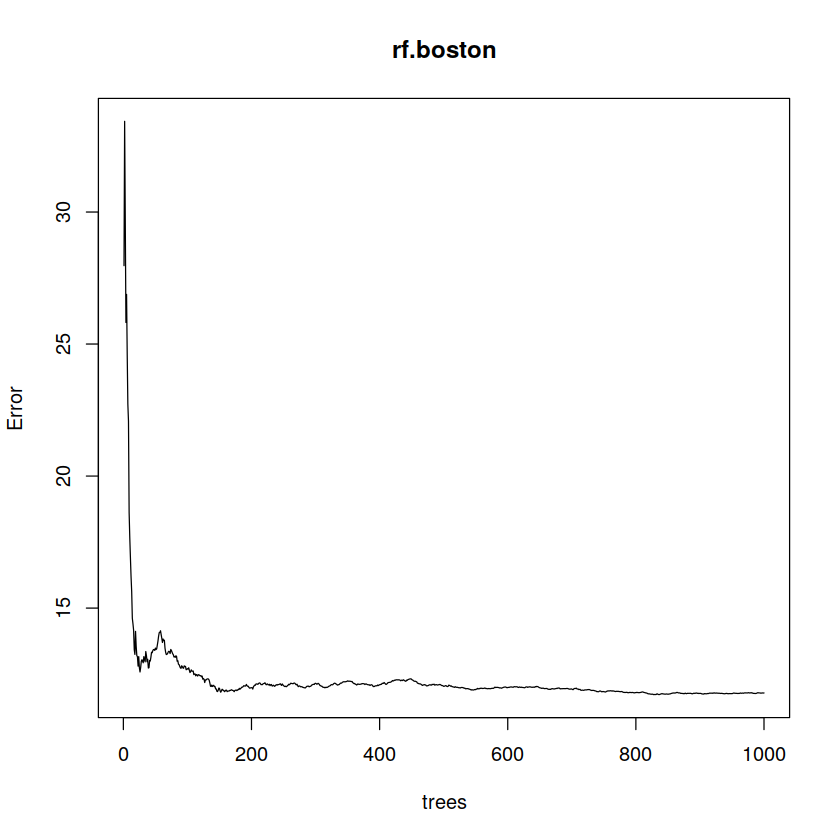

In [6]:
plot(rf.boston)

**d.** Perform boosting on the training set with $B=20000$ trees, complexity $d=3$ and shrinkage parameter $\lambda=0.001$.

Solutions:

In [7]:
library(gbm)
boost.boston <- gbm(medv ~ .,data=training.data,distribution="gaussian",n.trees=20000,interaction.depth=3,shrinkage=0.001)

Loading required package: survival

Attaching package: ‘survival’

The following object is masked from ‘package:caret’:

    cluster

Loading required package: splines
Loading required package: parallel
Loaded gbm 2.1.3


**f.** Use the hold-out sample `test.data` to compare i) the single pruned tree, ii) the random forest, iii) boosting, and iv) our Elastic Net model as well as our OLS models from Exercise 2.

Solutions:

In [8]:
# Pruned tree
pp <- predict(pruned.tree,newdata=test.data,n.trees=1000)
print(mean((pp-test.data$medv)^2))

# Random Forest
pp <- predict(rf.boston,newdata=test.data,n.trees=1000)
print(mean((pp-test.data$medv)^2))

# Boosting
pp <- predict(boost.boston,newdata=test.data,n.trees=22000)
print(mean((pp-test.data$medv)^2))

[1] 13.86585
[1] 7.911958


Warning message in predict.gbm(boost.boston, newdata = test.data, n.trees = 22000):
“Number of trees not specified or exceeded number fit so far. Using 20000.”

[1] 8.685576


Random Forest is performing the best. Pruned trees and boosting do worse than Random Forest but not worse than OLS.

Ranking
1. Random Forest
2. Boosting
3. Elastic Net
4. OLS simple model
5. Single pruned tree
6. OLS complex model